In [44]:
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y=True,as_frame=True)

dataset overview


In [45]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


pre-processing dataset

Normalizing data

Standard Scaler

In [46]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

MinMaxScaler

In [47]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler



sc = StandardScaler()
minmax = MinMaxScaler()
#X = sc.fit_transform(X)
X = minmax.fit_transform(X)

split train and test

In [49]:
from sklearn.model_selection import train_test_split,cross_val_score



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)


X_train shape:  (455, 30)
y_train shape:  (455,)
X_test shape:  (114, 30)
y_test shape:  (114,)


In [50]:
from sklearn.svm import SVC
clf = SVC()

In [51]:
clf.fit(X_train,y_train)

SVC()

predicting the test x

In [52]:
ypreds = clf.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

print("accuracy score: ",accuracy_score(y_test, ypreds))
print("recall score: ",recall_score(y_test, ypreds))
print("f1 score: ",f1_score(y_test, ypreds))
print("auc score: ",roc_auc_score(y_test, ypreds))



accuracy score:  0.9736842105263158
recall score:  1.0
f1 score:  0.9795918367346939
auc score:  0.9642857142857143


plotting confusion matrix 

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


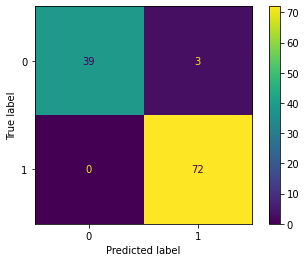

In [54]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(clf,X_test,y_test)


cross-validation with 5 folds

In [55]:
from sklearn.model_selection import cross_val_score
x = cross_val_score(clf,X,y,cv=5)

In [56]:
x.mean()

0.9736531594472908

pipeline introduction

In [57]:
from sklearn.pipeline import Pipeline

building sklearn pipeline

In [58]:
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf',SVC())
])

fiting pipeline

In [59]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', SVC())])

predicting X_test

In [60]:
ypreds = pipe.predict(X_test)
ypreds

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [61]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

print("accuracy score: ",accuracy_score(y_test, ypreds))
print("recall score: ",recall_score(y_test, ypreds))
print("f1 score: ",f1_score(y_test, ypreds))
print("auc score: ",roc_auc_score(y_test, ypreds))

accuracy score:  0.9736842105263158
recall score:  1.0
f1 score:  0.9795918367346939
auc score:  0.9642857142857143
